In [1]:
# -*- coding: utf-8 -*-
from __future__ import unicode_literals

import itertools, os, re, sys
import numpy as np
import pandas as pd

import graphviz # install with pip / pip3 not conda!
# [https://graphviz.readthedocs.io/en/stable/index.html]

if 0:
    # several of these settings may be crucial for correct formatting 
    # of tick labels in plots (Arial Unicode MS, using LaTeX, etc.)
    import matplotlib as mpl
    mpl.use("pgf")               # allows pdflatex processing of output
    import matplotlib.pyplot as plt
    #plt.rcParams['figure.autolayout'] = True
    plt.rcParams['figure.figsize'] = [8, 8] # [8, 8]
    # color maps: inferno, magma, plasma, viridis
    plt.rcParams['image.cmap'] = 'viridis'
    plt.rcParams.update({
        "font.family": "serif",  # use serif/main font for text elements
        "text.usetex": False,     # use inline math for ticks
        "pgf.rcfonts": False,    # don't setup fonts from rc parameters
        "pgf.preamble": [
             "\\usepackage{units}",          # load additional packages
             "\\usepackage{metalogo}",
             "\\usepackage{amssymb}",
             "\\usepackage{unicode-math}",   # unicode math setup
    #         r"\setmathfont{xits-math.otf}",   # not installed!
             r"\setmainfont{Arial Unicode MS}",  # serif font via preamble
             ],
#        "font.serif": ['Times New Roman', 'Palatino', 'New Century Schoolbook',
#                       'Bookman', 'Computer Modern Roman'],
        "font.serif": ['Arial Unicode MS', 'Times New Roman', 'Lucida Grande', 'Verdana'],
        "font.sans-serif": ['Arial Unicode MS', 'DejaVu Sans', 'Helvetica', 'Avant Garde',
                            'Computer Modern Sans serif']
    })
else: # xxx unicode tick labels not formated correctly -- now they do work?!
    import matplotlib.pyplot as plt
    #plt.rcParams['figure.autolayout'] = True
    plt.rcParams['figure.figsize'] = [8, 8] # [8, 8]
    # color maps: inferno, magma, plasma, viridis
    plt.rcParams['image.cmap'] = 'viridis'
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'Noto Sans',
                                       'Lucida Grande', 'Verdana'],
    plt.rcParams['font.serif'] = ['Arial Unicode MS', 'DejaVu Sans', 
                                  'Times New Romain', 'Noto Serif']
data_dir = os.path.expanduser('~') + \
           '/Desktop/tmorph_output/'
print('done')

# todo:
# - place symbols in IPA order

done


In [10]:
# Info from run
train_dat = pd.read_csv(data_dir +'train_results.csv')
test_dat = pd.read_csv(data_dir +'test_results.csv')
print(test_dat.head())

symbols = np.loadtxt(data_dir +'symbols.txt', dtype='str')
features = np.loadtxt(data_dir +'features.txt', dtype='str')
filler_matrix = np.load(data_dir +'filler_matrix.npy')
role_matrix = np.load(data_dir +'role_matrix.npy')
test_pred = pd.read_csv(data_dir +'test_results.csv', dtype='str')
stem_tpr = np.load(data_dir +'root-cogrammar-Stem.npy')
affix_tpr = np.load(data_dir +'root-cogrammar-Affix.npy')
output_tpr = np.load(data_dir +'root-cogrammar-Output.npy')

morph_indx = np.load(data_dir +'root-cogrammar-combiner-morph_indx.npy')
stem_indx = np.load(data_dir +'root-cogrammar-combiner-stem_indx.npy')
affix_indx = np.load(data_dir +'root-cogrammar-combiner-affix_indx.npy')
output_indx = np.load(data_dir +'root-cogrammar-combiner-output_indx.npy')
pivot_prob = np.load(data_dir +'root-cogrammar-combiner-pivot_prob.npy')
unpivot_prob = np.load(data_dir +'root-cogrammar-combiner-unpivot_prob.npy')

writer_alpha = np.load(data_dir +'root-cogrammar-combiner-writer-alpha.npy')
writer_beta0 = np.load(data_dir +'root-cogrammar-combiner-writer-beta0.npy')
writer_beta1 = np.load(data_dir +'root-cogrammar-combiner-writer-beta1.npy')
writer_omega = np.load(data_dir +'root-cogrammar-combiner-writer-omega.npy')
writer_delta0 = np.load(data_dir +'root-cogrammar-combiner-writer-delta0.npy')
writer_delta1 = np.load(data_dir +'root-cogrammar-combiner-writer-delta1.npy')

nsym, nftr, nrole = len(symbols), len(features), stem_tpr.shape[1]
print ('nsym:{} nftr:{} nrole:{}'.format(nsym, nftr, nrole))
print (symbols)
print (features)

      stem       output morphosyn         pred  accuracy
0  b a p o  b a p o p o       ???  b a p o b a         0
1  k o g a  k o g a g a       ???  k o g a ε o         0
nsym:16 nftr:22 nrole:22
['ε' '⋊' '⋉' 'a' 'o' 'e' 'u' 'i' 'l' 'k' 'g' 'p' 'd' 'b' 'w' 'j']
['sym' 'begin' 'end' 'C' 'V' 'syllabic' 'consonantal' 'sonorant'
 'delayed.release' 'voice' 'LABIAL' 'round' 'CORONAL' 'anterior'
 'distributed' 'lateral' 'DORSAL' 'high' 'low' 'front' 'back' 'tense']


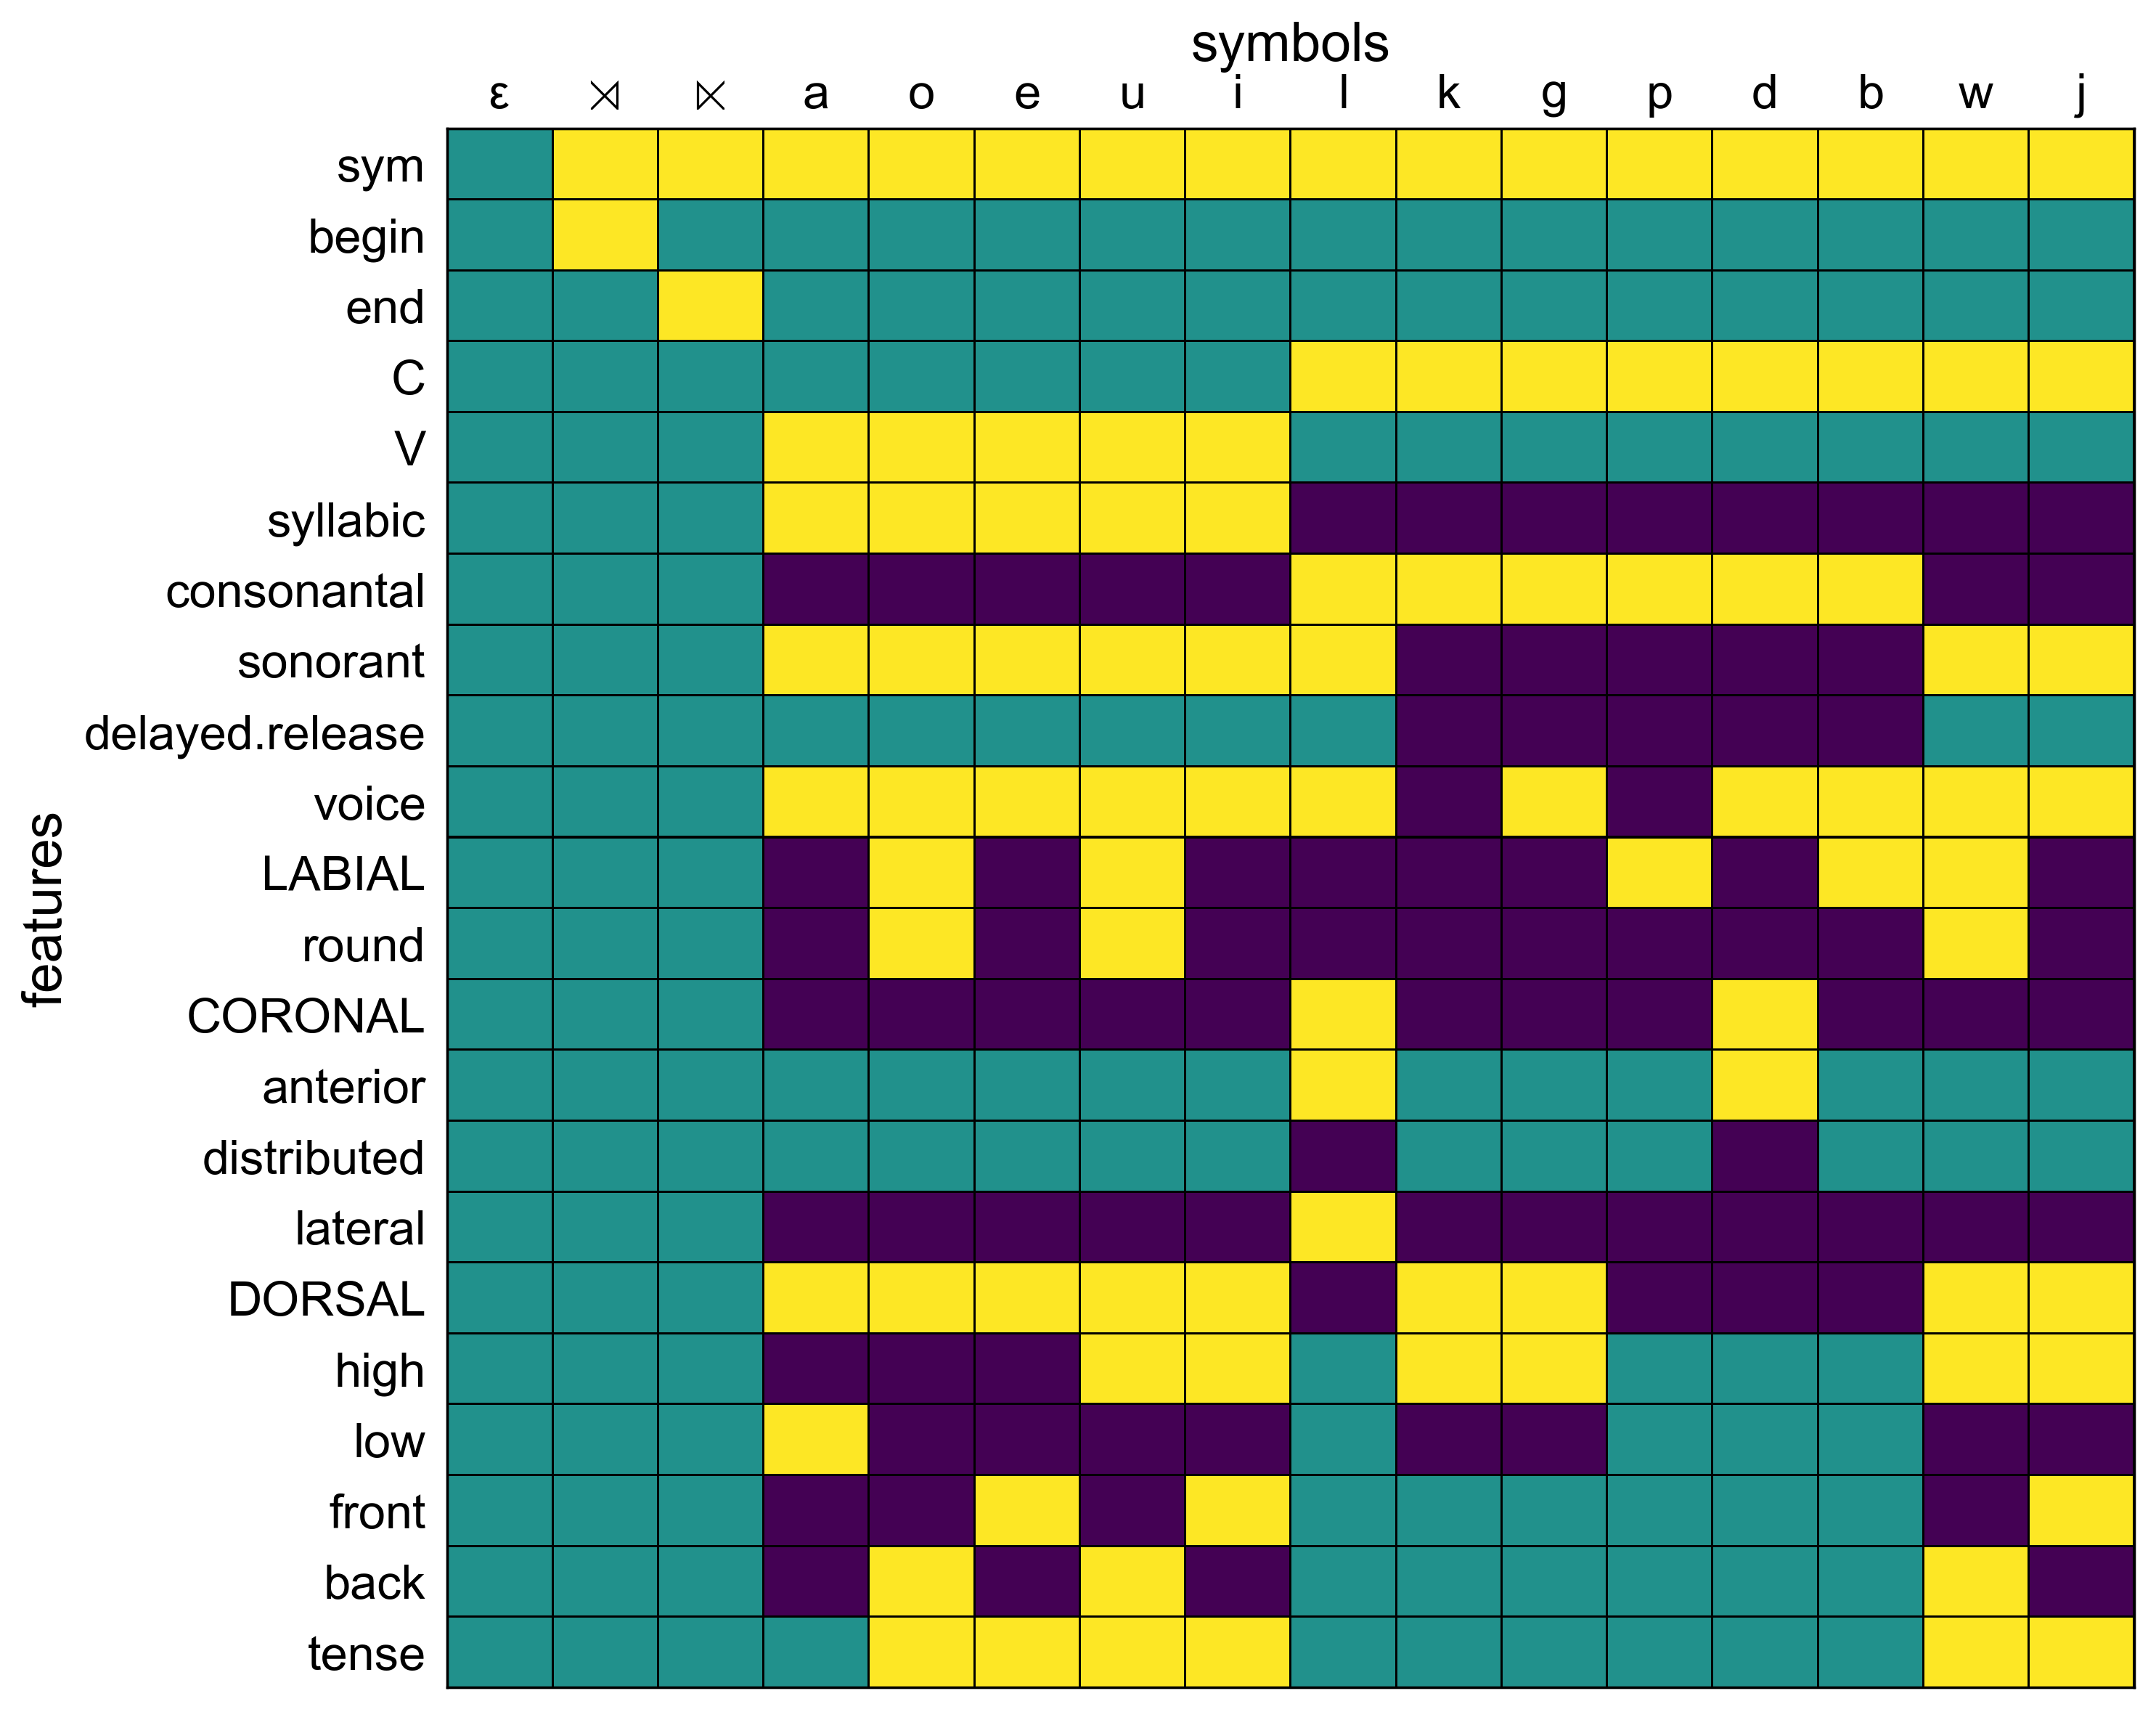

In [11]:
# Matrix of fillers (one per column)
def plot_filler_matrix(filler_matrix, symbols, features, outfile):
    fig = plt.figure(figsize=(10,8), dpi=300)
    plt.pcolormesh(filler_matrix, vmin=-1.0, vmax=1.0,
                   edgecolors='black', shading='flat', linewidth=0.5)
    ax1 = plt.gca() # get plot axes, creating if necessary
    ax1.invert_yaxis()
    ax1.set_xticks([])
    ax1.set_yticklabels(features, fontsize=16)
    ax1.set_yticks([j+0.5 for j in range(len(features))])
    ax1.tick_params(left=False, bottom=False)
    ax1.set_ylabel('features', fontsize=18)
    ax2 = ax1.twiny()
    ax2.set_xlim(ax1.get_xlim())
    ax2.set_xticks([i+0.50 for i in range(nsym)])
    ax2.set_xticklabels(symbols, fontsize=16, verticalalignment='baseline')
    ax2.tick_params(top=False) #, pad=10, labelrotation=0)
    ax2.set_xlabel('symbols', fontsize=18)
    plt.tight_layout()
    plt.savefig(outfile)

if 1:
    plot_filler_matrix(filler_matrix, symbols, features,
                       data_dir+'/tmorph_figures/filler_matrix.png')

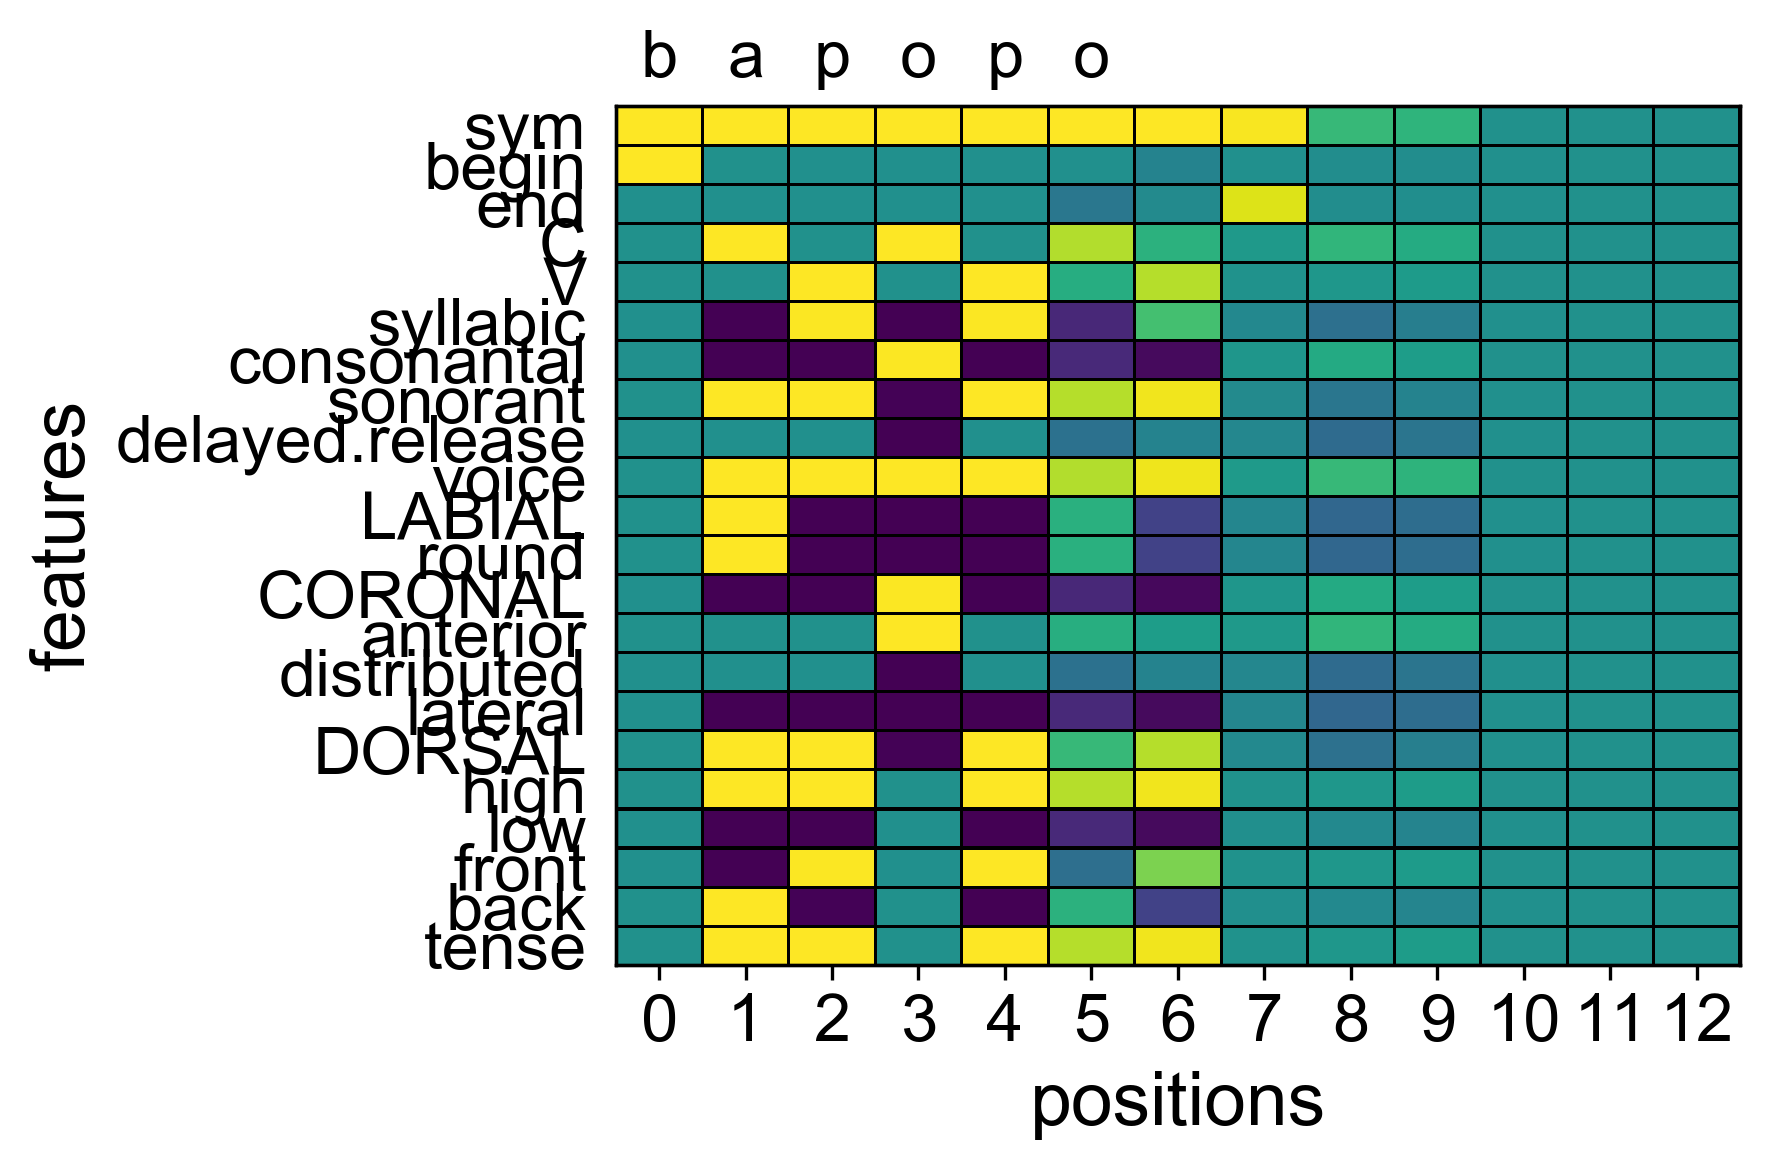

In [12]:
# Stem / affix / output / target tpr
form_select = {0:'stem', 1:'affix', 2:'target', 3:'output'}[3] # xxx name confusion target/output, output/pred 
indx = 0
Form = np.load(data_dir +'root-cogrammar-'+ form_select +'.npy')[0]
try:
    form = test_dat[form_select][0]
except:
    form = ''
dfill, nrole = Form.shape
#print(X.shape)

plt.figure(dpi=300)
plt.pcolormesh(Form, vmin=-1.0, vmax=1.0, edgecolors='black', alpha=1.0, shading='flat', linewidth=0.5)

ax1 = plt.gca() # get plot axes, creating if necessary
#ax1.set_aspect('equal')
ax1.invert_yaxis()
ax1.set_xlabel('positions', fontsize=18)
ax1.set_xticks([i+0.5 for i in range(nrole)])
ax1.set_xticklabels(range(nrole), fontsize=16)
ax1.set_ylabel('features', fontsize=18)
ax1.set_yticklabels(features, fontsize=16)
ax1.set_yticks([j+0.5 for j in range(len(features))])
ax1.tick_params(left=False, bottom=False)

ax2 = ax1.twiny()
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks([i+0.5 for i in range(nrole)])
ax2.set_xticklabels(form.split(' '), fontsize=16, verticalalignment='baseline')
ax2.tick_params(top=False) #, bottom=False, left=False, right=False)
plt.tight_layout()

if 1:
    plt.savefig(data_dir+'/tmorph_figures/stem_indexed_tpr.png')

(1, 10, 2)


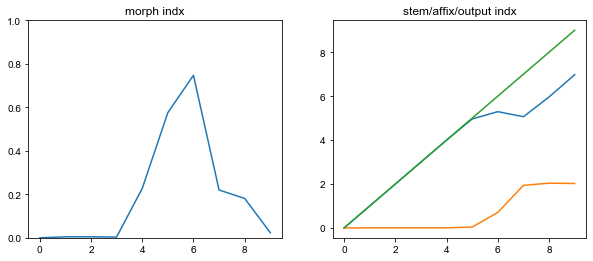

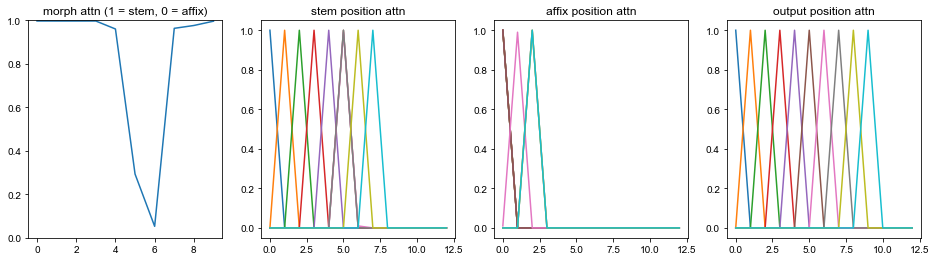

In [9]:
# Soft indices over timesteps
fig,ax = plt.subplots(1, 2, figsize=(10,4))
ax[0].plot(morph_indx[0]); ax[0].set_ylim(0,1); ax[0].set_title('morph indx')
ax[1].plot(stem_indx[0]); ax[1].set_title('stem/affix/output indx')
ax[1].plot(affix_indx[0])
ax[1].plot(output_indx[0])

fig, ax = plt.subplots(1, 4, figsize=(16,4))
print(writer_alpha.shape)
ax[0].plot(writer_alpha[0][:,0]); ax[0].set_ylim(0,1); ax[0].set_title('morph attn (1 = stem, 0 = affix)')
ax[1].plot(writer_beta0[0][:,:15].T); ax[1].set_title('stem position attn')
ax[2].plot(writer_beta1[0][:,:15].T); ax[2].set_title('affix position attn')
ax[3].plot(writer_omega[0][:,:15].T); ax[3].set_title('output position attn')
plt.show()

In [ ]:
# # # # # unedited # # # # # #

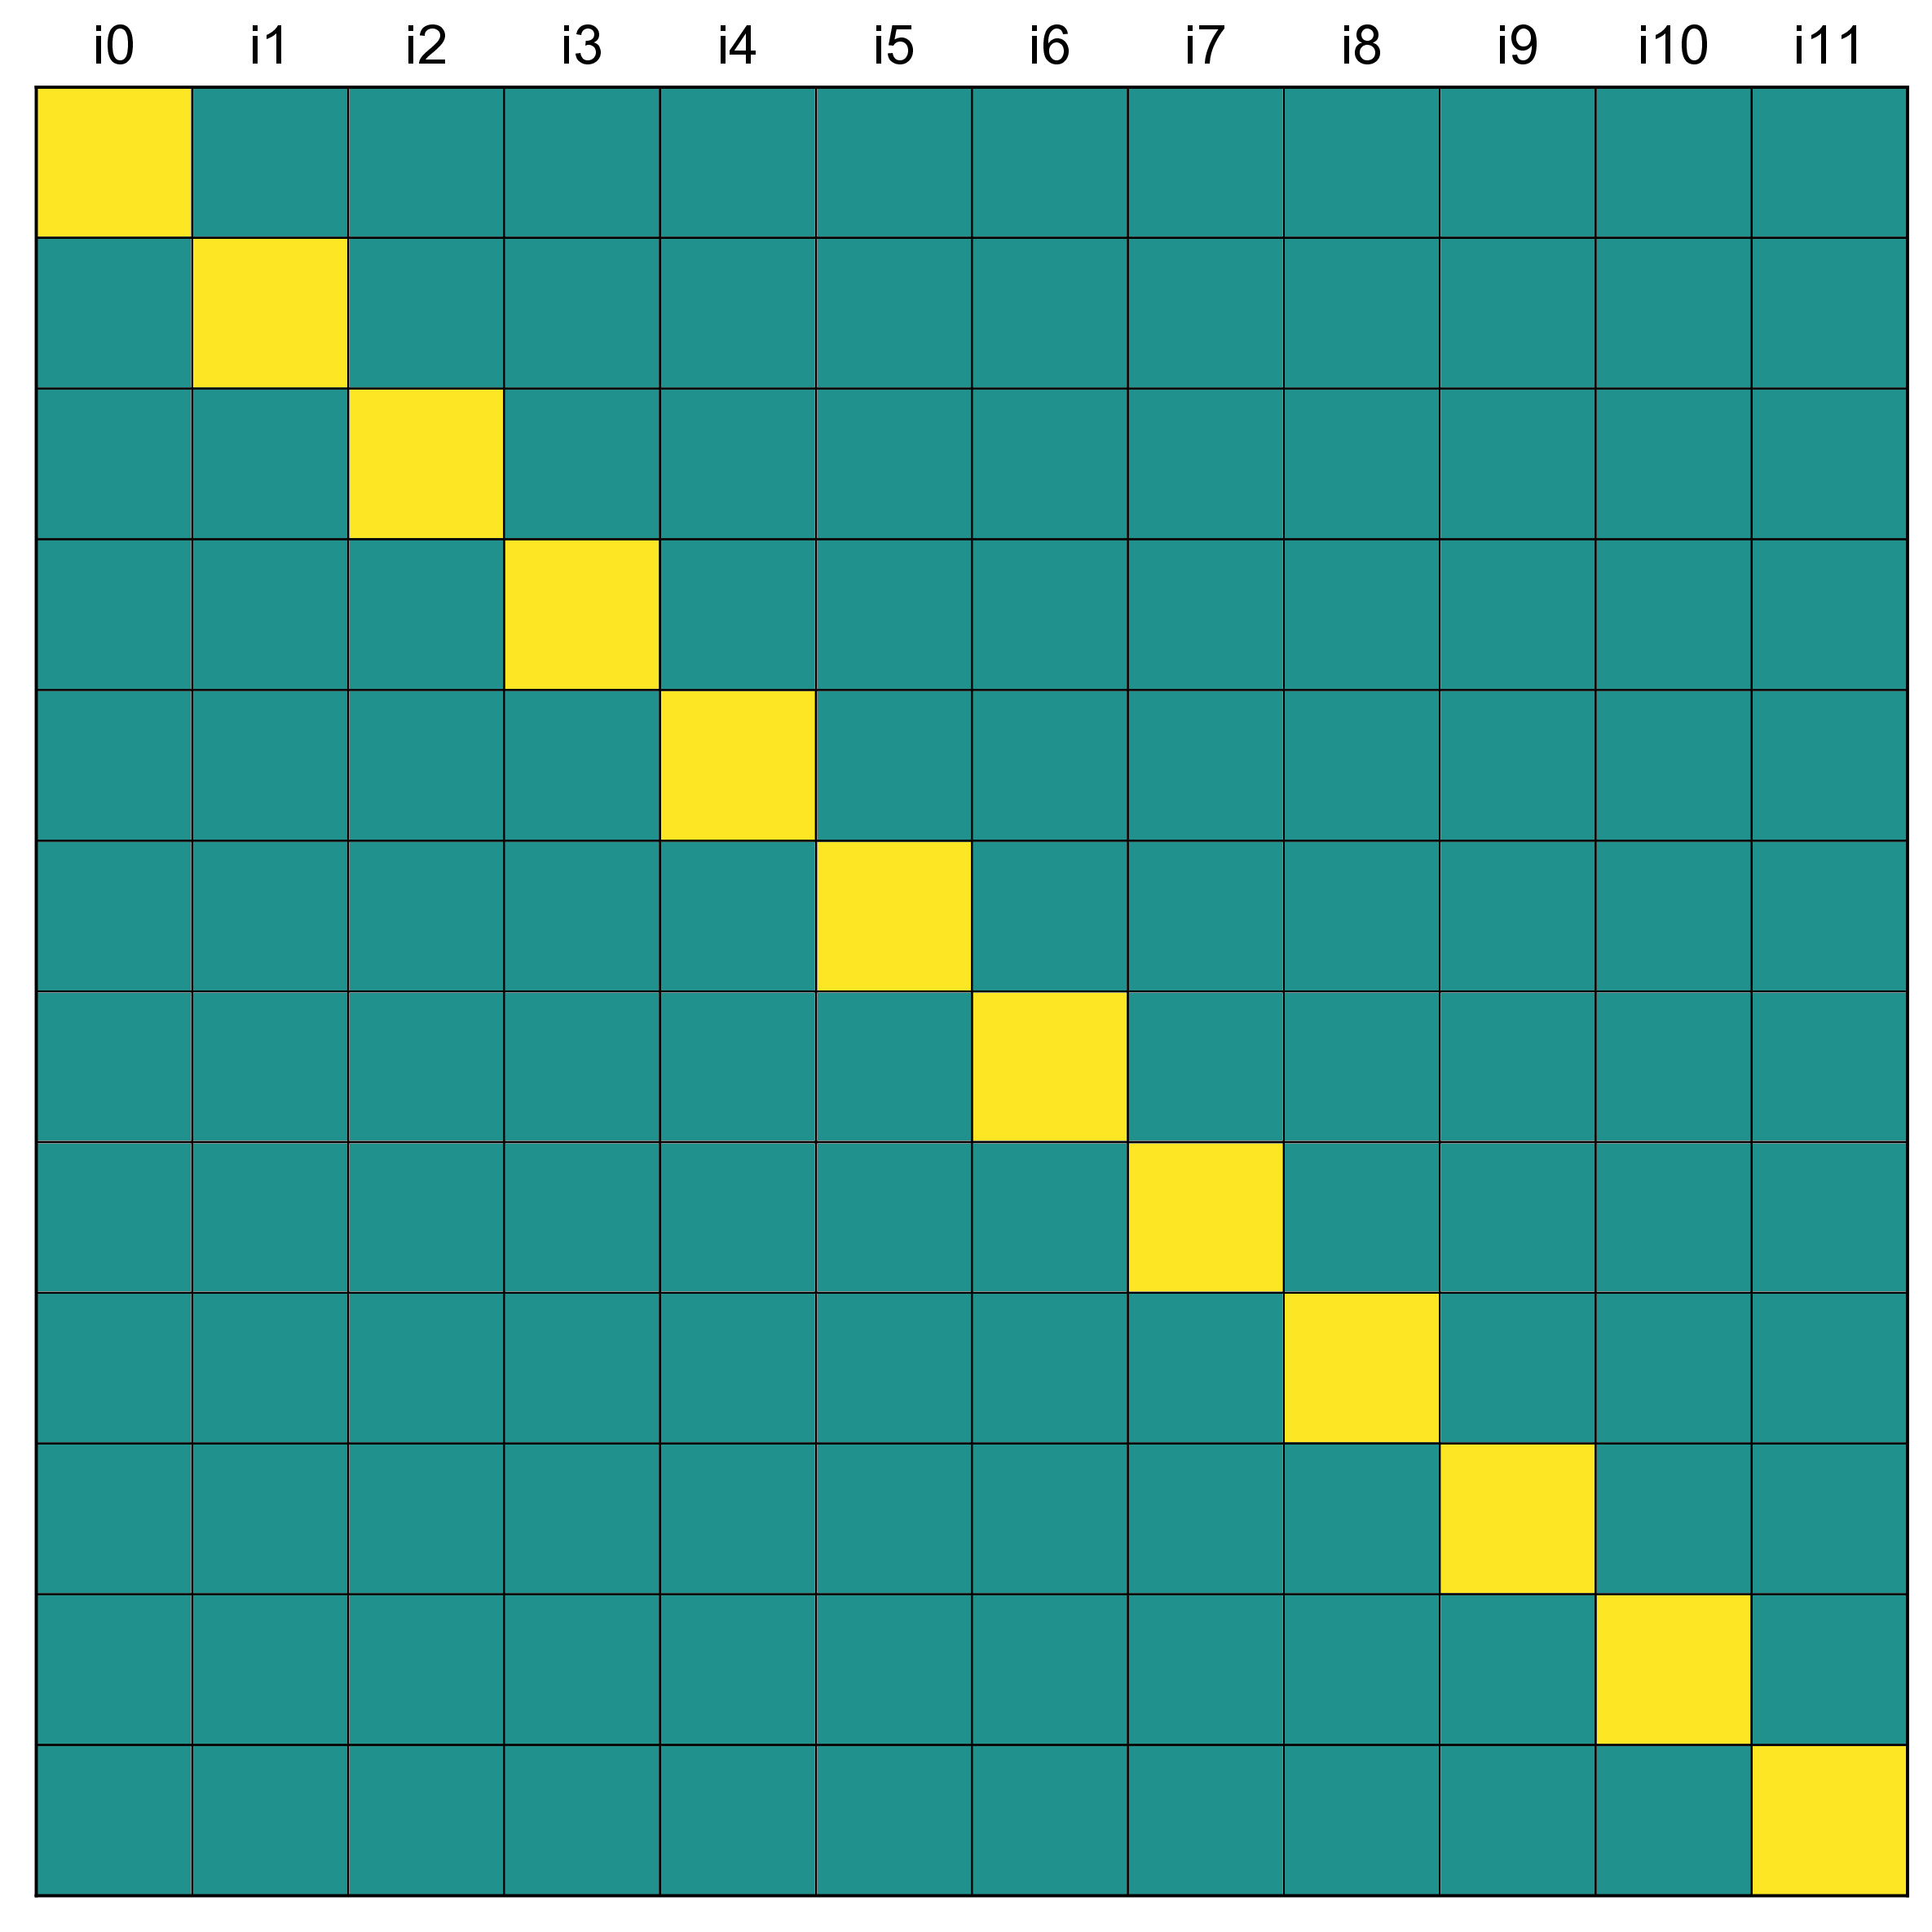

In [31]:
# Reduplication model
# Plot correspondence indices
plt.figure(dpi=300)
plt.pcolormesh(corresp_indices, vmin=-1.0, vmax=1.0, edgecolors='black', alpha=1.0, shading='flat', linewidth=0.5)

ax1 = plt.gca() # get plot axes, creating if necessary
#ax1.set_aspect('equal')
ax1.invert_yaxis()
#ax1.set_xlabel('positions', fontsize=18)
ax1.set_xticks([])
#ax1.set_xticklabels(['i{}'.format(i) for i in range(nrole)], fontsize=16)
#ax1.set_ylabel('features', fontsize=18)
#ax1.set_yticklabels(features, fontsize=16)
ax1.set_yticks([])
ax1.tick_params(left=False, bottom=False)

ax2 = ax1.twiny()
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks([i+0.5 for i in range(nrole)])
ax2.set_xticklabels(['i{}'.format(i) for i in range(nrole)],
                    fontsize=16, verticalalignment='baseline')
ax2.tick_params(top=False) #, bottom=False, left=False, right=False)
plt.tight_layout()

if 0:
    plt.savefig(data_dir+'../tmorph_figures/correspondence_indices.png')

In [11]:
# Plot attention over timesteps
#morph_indx = np.load(data_dir +'root-combiner-morph_indx.npy')
morph_indx = np.load(data_dir +'root-combiner-affix_indx.npy')
print (morph_indx.shape)
plt.plot(morph_indx[0,:,0], marker='o')
#plt.axhline(y=0.5, color='black', linestyle='--')
#plt.ylim(-0.25,1.25)

(1, 12, 1)


```mermaid
graph TD;
    A-->B;
    A-->C;
    B-->D;
    C-->D;
```

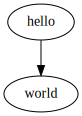

In [7]:
# Example graph
grph = graphviz.Digraph()
grph.edge('hello', 'world')
grph

In [8]:
grph = graphviz.Source.from_file('/Users/colin/Dropbox/TensorProductStringToStringMapping/LSA2019/slides/figures/network.dot')
grph

FileNotFoundError: [Errno 2] No such file or directory: '/Users/colin/Dropbox/TensorProductStringToStringMapping/LSA2019/slides/figures/network.dot'

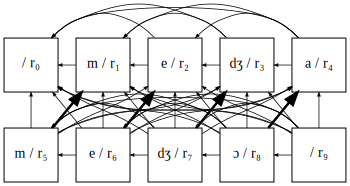

In [12]:
# Correspondence graph -- prior to application of faithfulness
NUMSUB = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉") # hack for numerical subscripts with translate()
form = ['⋊', 'm', 'e', 'dʒ', 'a', 'm', 'e', 'dʒ', 'ɔ', '⋉'] # Javanese 'tables'
form = [(x+r' / r'+str(i)).translate(NUMSUB) for i,x in enumerate(form)]
n = len(form)
grph = graphviz.Digraph(comment='correspondence',
                        node_attr={'shape': 'square', 'fixedsize': 'true', 'width': '0.75', 'height': '0.75'},
                        graph_attr={'rankdir': 'TB'},
                        engine='dot')
redup_indx = range(n//2)
base_indx = range(n//2,n)
with grph.subgraph(name='redup') as s:
    s.attr(rank='same')
    for i in redup_indx:
        s.node(str(i), form[i]) #, pos=str(i)+',0!')
    #s.node(str(-1), '...', shape='none')
    #grph.edge(str(n//2-1), str(-1), visible='false')
    with grph.subgraph(name='base') as s:
        s.attr(rank='same')
        for i in base_indx:
            s.node(str(i), form[i]) #, pos=str(i-n//2)+',-2!')
if 1:
    for i in range(n):
        for j in range(i+1,n):
            penwidth = 2.5 if (0 < i < n//2 and j==(i+n//2-1)) else 0.75
            grph.edge(str(i), str(j), dir='back', arrowsize=str(penwidth/2), penwidth=str(penwidth))
grph

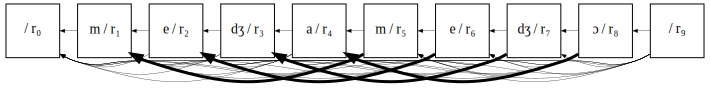

In [13]:
grph = graphviz.Digraph(comment='correspondence',
                        graph_attr={'rankdir': 'BT', 'concentrate': 'true', 'splines': 'spline'},
                        node_attr={'shape': 'square', 'fixedsize': 'true', 'width': '0.75', 'height': '0.75'},
                        edge_attr={'minlen': '100', 'weight': '10'},
                        engine='neato')
redup_indx = range(n//2)
base_indx = range(n//2,n)
with grph.subgraph(name='redup') as s:
    s.attr(rank='same')
    for i in itertools.chain(redup_indx, base_indx):
        s.node(str(i), form[i], pos=str(i)+',0!')
    #s.node(str(-1), '...', shape='none')
    #grph.edge(str(n//2-1), str(-1), visible='false')
#    with grph.subgraph(name='base') as s:
#        s.attr(rank='same')
#        for i in itertools.chain(redup_indx, base_indx):
#            s.node(str(i+n), form[i]) #, pos=str(i-n//2)+',-2!')
if 1:
    for i in range(n):
        for j in range(i+1,n):
            corresp = (0 < i < n//2 and j==(i+n//2-1))
            arrowsize = 1.0 if corresp else 0.5
            penwidth = 3.0 if corresp else 0.3
            grph.edge(str(i), str(j), dir='back', arrowsize=str(arrowsize), penwidth=str(penwidth))
grph        

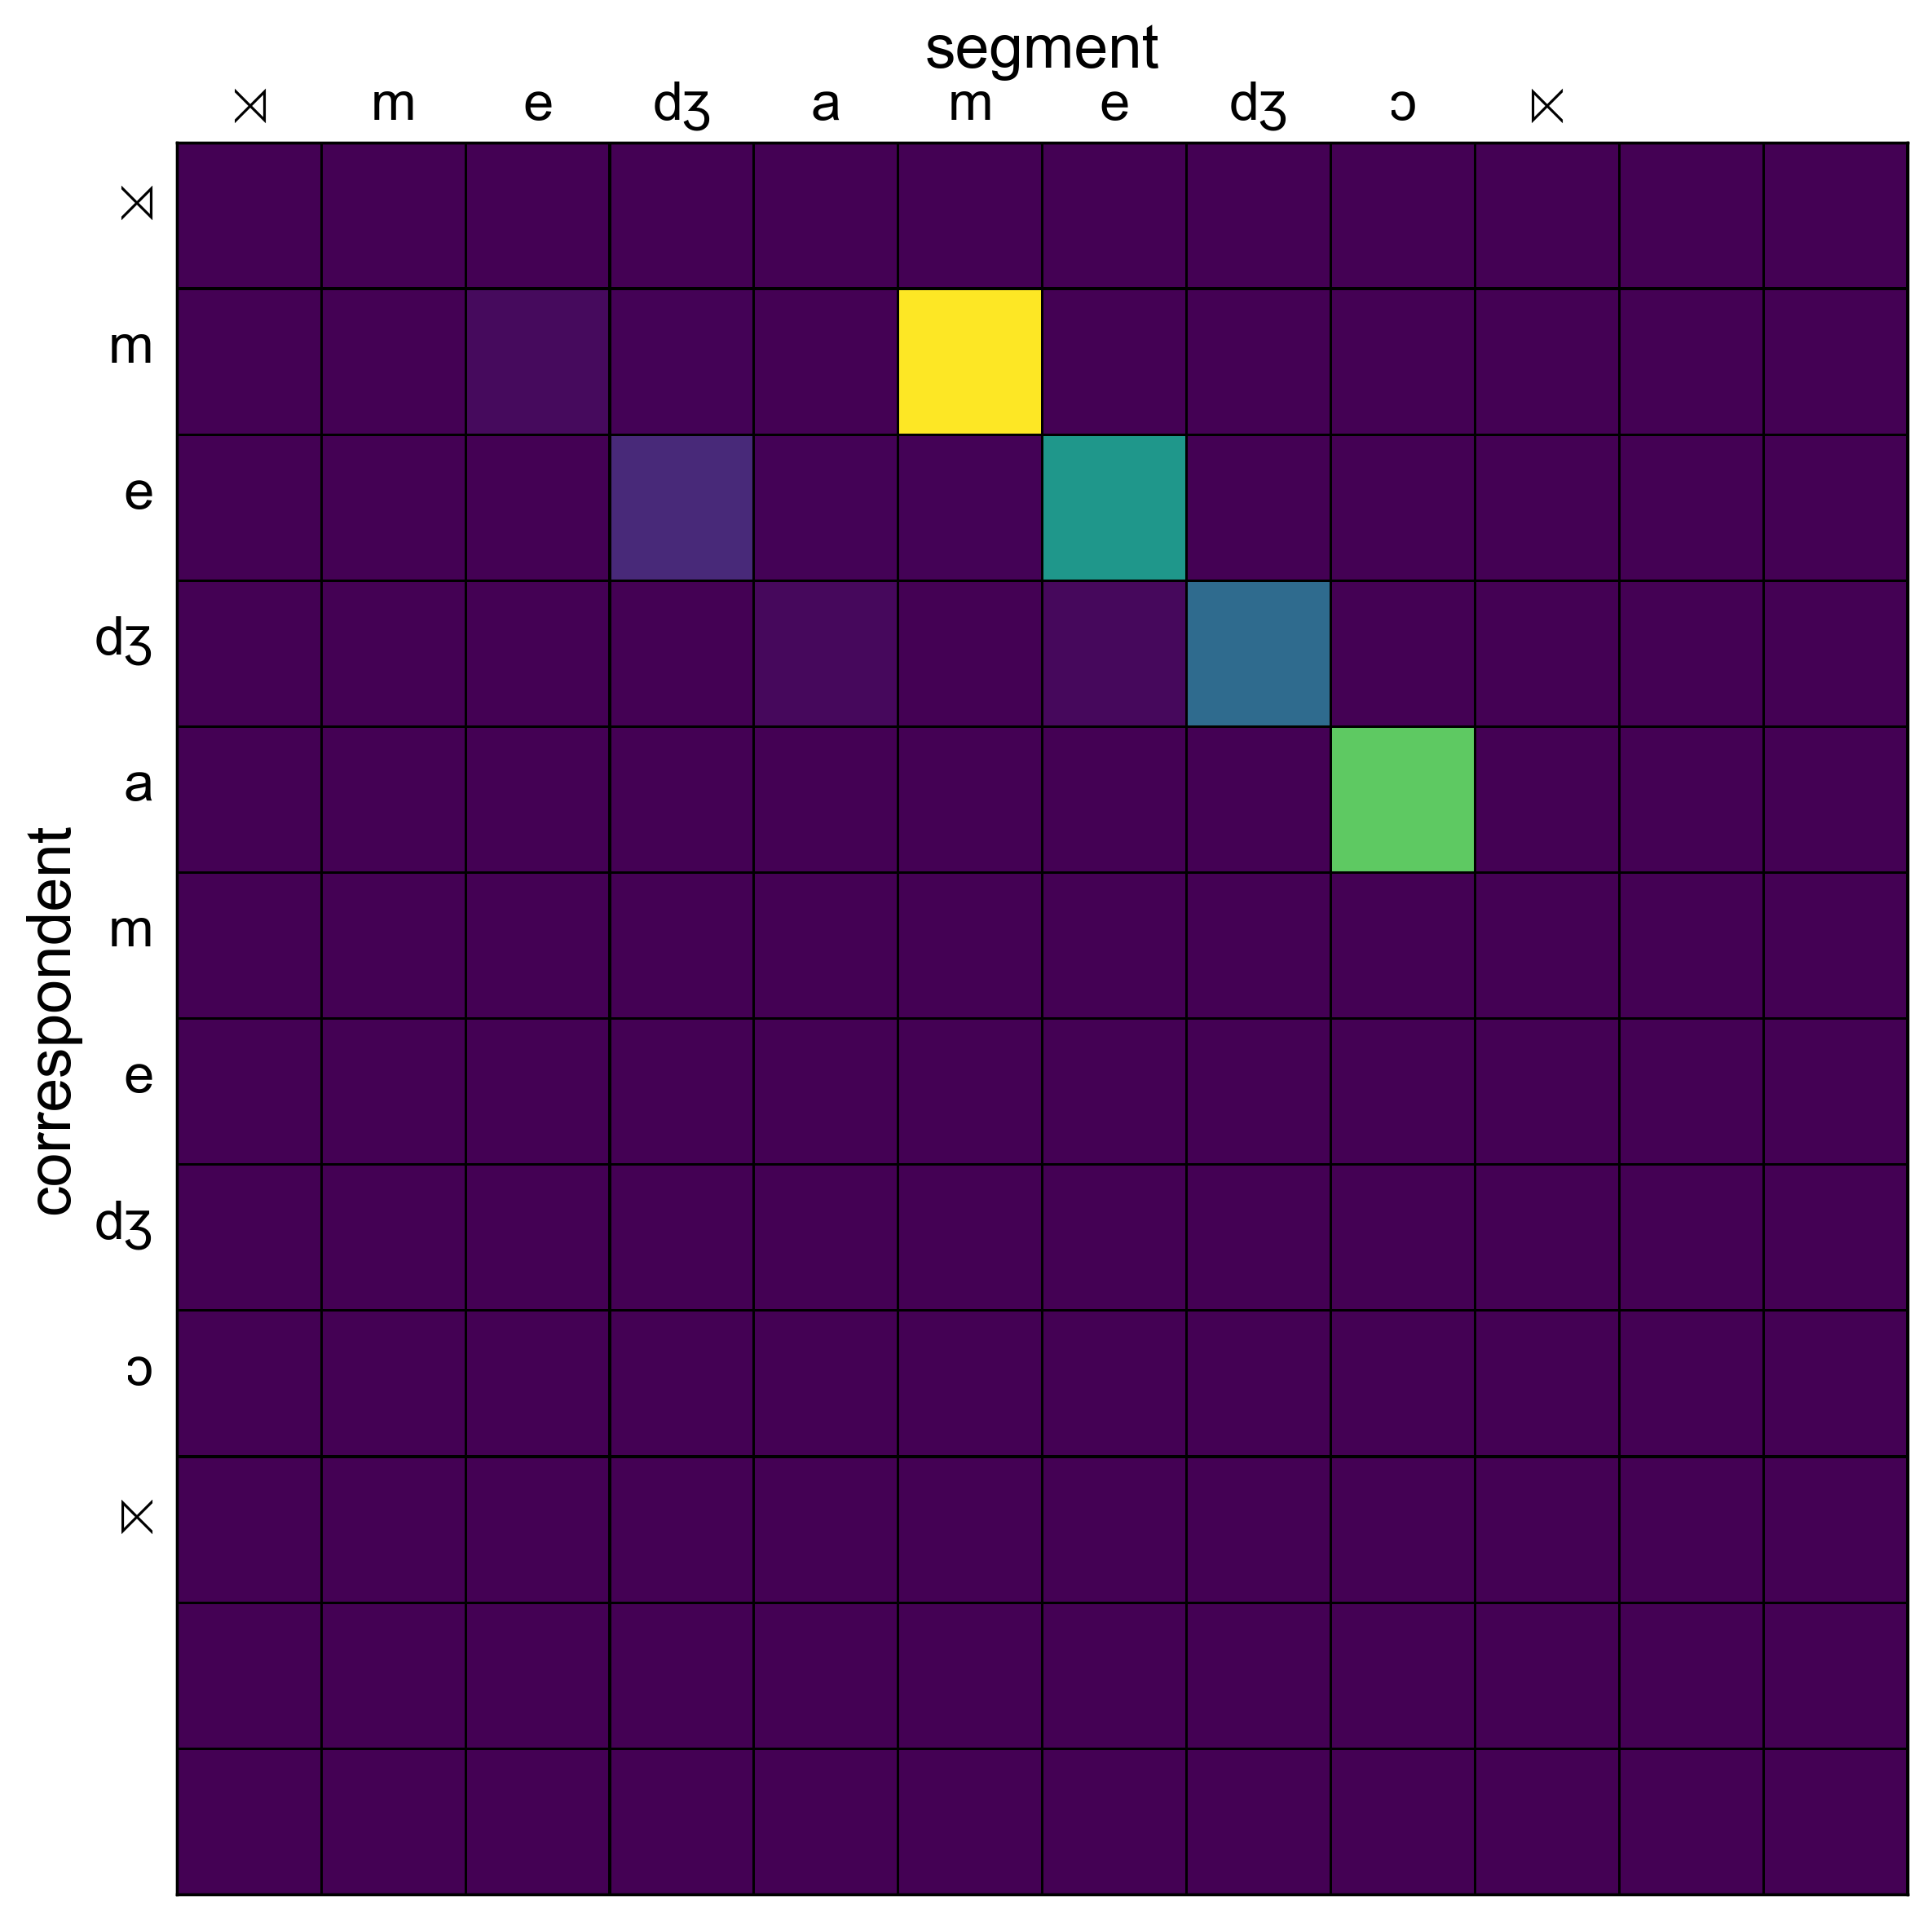

In [25]:
# Plot correspondence info
form = '⋊ m e dʒ a m e dʒ ɔ ⋉' # output prior to correspondence copy

#S = np.load(data_dir +'root-correspondence-correspondence_LR-sim.npy')
S = np.load(data_dir +'root-correspondence-correspondence_RL-sim.npy')
#alpha = np.load(data_dir +'root-correspondence-alpha.npy')[:,:,np.newaxis]
nrole = S.shape[1]
#print(X.shape)
#print (np.round((S[0,:,:]), 2))

plt.figure(figsize=(8,8), dpi=300)
plt.pcolormesh(np.exp(S[0,:,:]), edgecolors='black', alpha=1.0, shading='flat', linewidth=0.5)

ax1 = plt.gca() # get plot axes, creating if necessary
ax1.invert_yaxis()
ax1.set_xticks([])
ax1.set_yticks([i+0.5 for i in range(nrole)])
ax1.set_yticklabels(form.split(' '), fontsize=16, verticalalignment='baseline')
ax1.set_ylabel('correspondent', fontsize=18)
ax1.tick_params(left=False, bottom=False)

ax2 = ax1.twiny()
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks([i+0.5 for i in range(nrole)])
ax2.set_xticklabels(form.split(' '), fontsize=16, verticalalignment='baseline')
ax2.set_xlabel('segment', fontsize=18)
ax2.tick_params(top=False)
plt.tight_layout()
#plt.show()

if 1:
#    plt.savefig(data_dir+'../tmorph_figures/correspondence_LR.png')
    plt.savefig(data_dir+'../tmorph_figures/correspondence_RL.png')

$$e^x=\sum_{i=0}^\infty \frac{1}{i!}x^i$$

| This | is   |
|------|------|
|   a  | table|

```python    
 def x(state):
    return state[0] == 'W'
 ```